# Insurance Risk Analytics - Exploratory Data Analysis

This notebook performs a thorough EDA on AlphaCare Insurance's car insurance dataset to uncover trends in claim risk, profitability, and premium allocation. The goal is to guide predictive modeling and business decisions.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV
df = pd.read_csv('../Datasets/MachineLearningRating_v3.csv', delimiter='|')
df.head()


C:\Users\sami1\AppData\Local\Temp\ipykernel_9500\858707507.py:7: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Datasets/MachineLearningRating_v3.csv', delimiter='|')


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


# Data Cleaning & Preprocessing

In [3]:
df.loc[(df['Gender'] == 'Not specified') & (df['Title'].str.lower() == 'mrs'), 'Gender'] = 'Female'
df.loc[(df['Gender'] == 'Not specified') & (df['Title'].str.lower() == 'mr'), 'Gender'] = 'Male'


# Reset to object type just in case they're already categorical
for col in ['Province', 'VehicleType']:
    df[col] = df[col].astype('object')

# Convert date column
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], errors='coerce')

# Drop invalid/illogical financial records
df = df[df['TotalPremium'] > 0]
df = df[df['TotalClaims'] >= 0]

# Handle missing values in key categorical columns
df.fillna({
    'Province': 'Unknown',
    'VehicleType': 'Unknown'
}, inplace=True)

# Convert to categorical
for col in [ 'Province', 'VehicleType']:
    df[col] = df[col].astype('category')

# Add derived features
df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']
df['HadClaim'] = (df['TotalClaims'] > 0).astype(int)

df.to_csv('../Datasets/MachineLearningRating_v4.csv', index=False)


# Data Summary

In [4]:
# Descriptive stats
df.describe(include='all').T

# Info
df.info()

# Missing values
missing = df.isnull().sum()
missing[missing > 0]


<class 'pandas.core.frame.DataFrame'>
Index: 618174 entries, 0 to 1000097
Data columns (total 54 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   UnderwrittenCoverID       618174 non-null  int64         
 1   PolicyID                  618174 non-null  int64         
 2   TransactionMonth          618174 non-null  datetime64[ns]
 3   IsVATRegistered           618174 non-null  bool          
 4   Citizenship               618174 non-null  object        
 5   LegalType                 618174 non-null  object        
 6   Title                     618174 non-null  object        
 7   Language                  618174 non-null  object        
 8   Bank                      535638 non-null  object        
 9   AccountType               587440 non-null  object        
 10  MaritalStatus             613103 non-null  object        
 11  Gender                    613553 non-null  object        
 12  Countr

Bank                        82536
AccountType                 30734
MaritalStatus                5071
Gender                       4621
mmcode                        218
make                          218
Model                         218
Cylinders                     218
cubiccapacity                 218
kilowatts                     218
bodytype                      218
NumberOfDoors                 218
VehicleIntroDate              218
CustomValueEstimate        462074
CapitalOutstanding              2
NewVehicle                  60633
WrittenOff                 378870
Rebuilt                    378870
Converted                  378870
CrossBorder                617920
NumberOfVehiclesInFleet    618174
dtype: int64

# Univariate Analysis

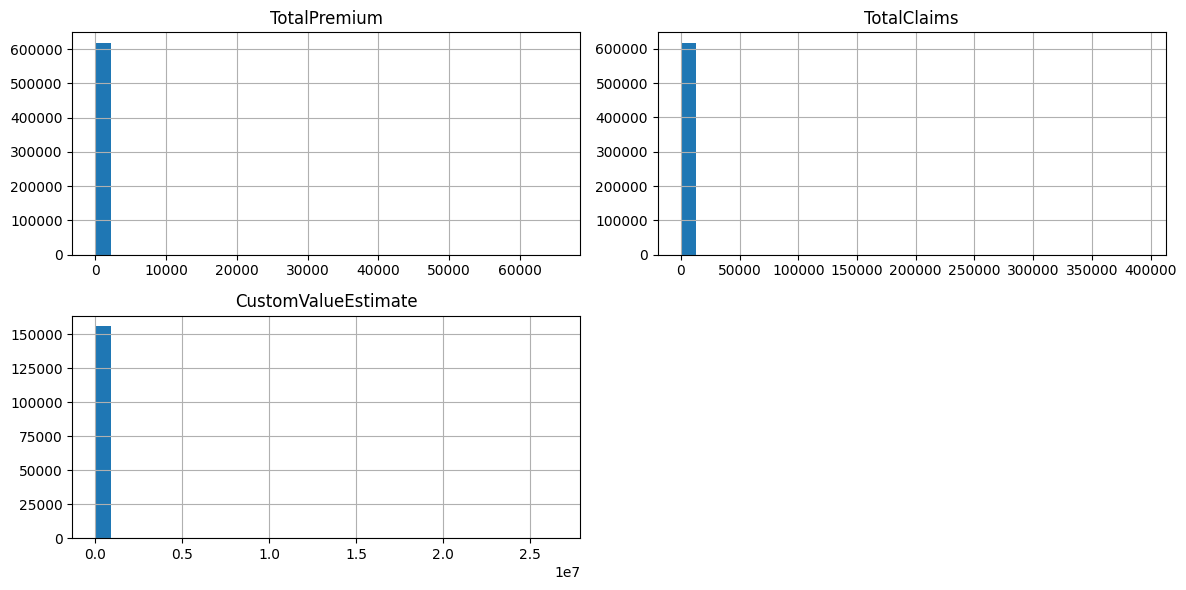

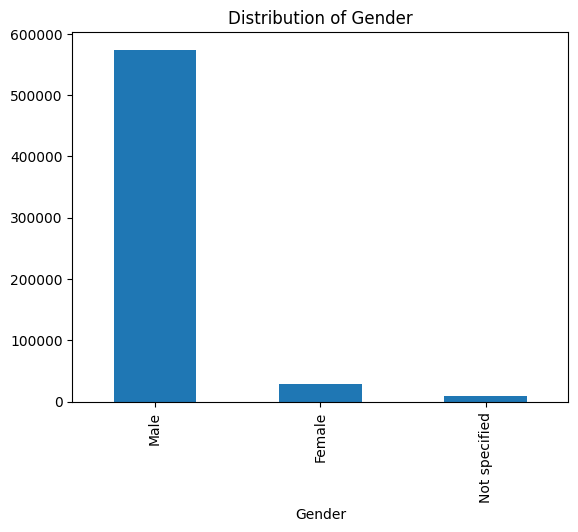

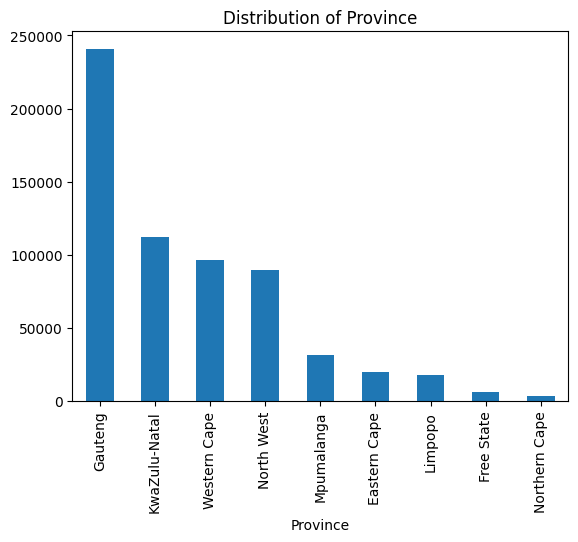

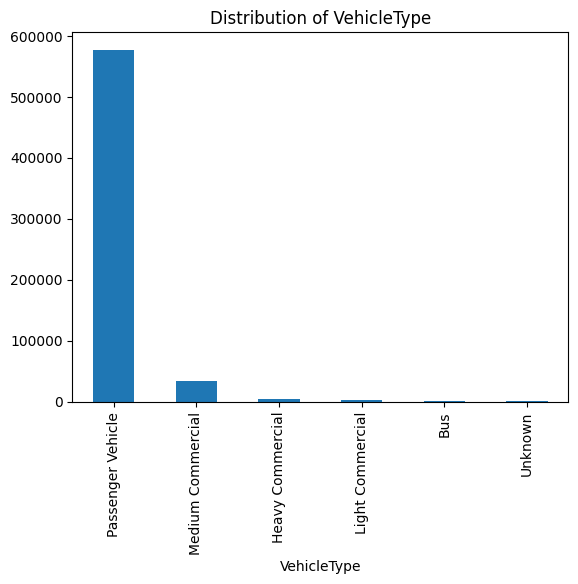

In [5]:
# Numerical
df[['TotalPremium', 'TotalClaims', 'CustomValueEstimate']].hist(bins=30, figsize=(12, 6))
plt.tight_layout()
plt.show()

# Categorical
for col in ['Gender', 'Province', 'VehicleType']:
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.show()


Bivariate/Multivariate Analysis

C:\Users\sami1\AppData\Local\Temp\ipykernel_9500\3242069754.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Province')['LossRatio'].mean().sort_values(ascending=False).plot(


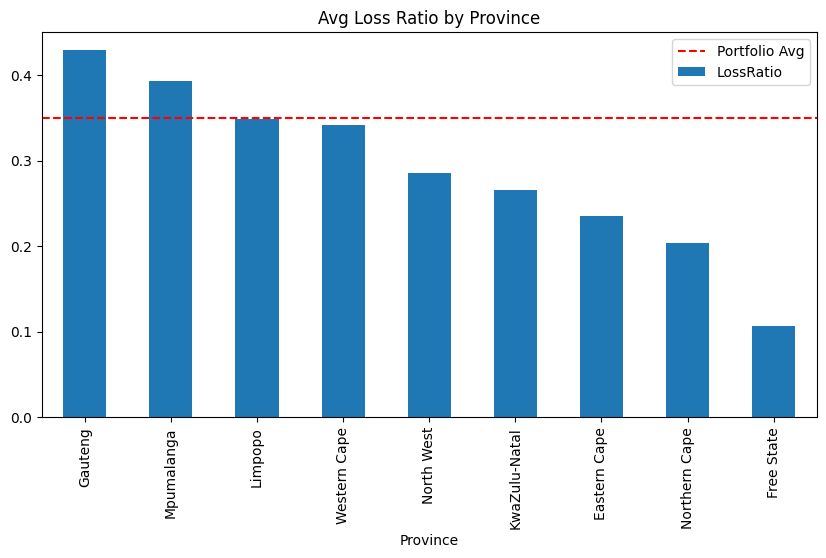

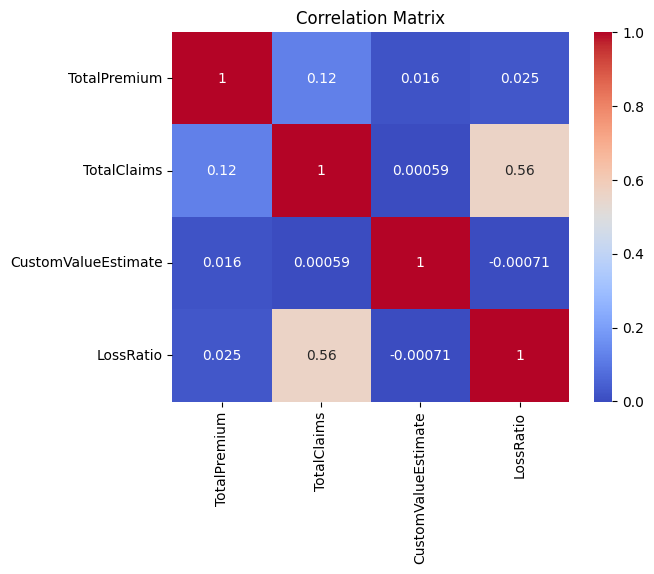

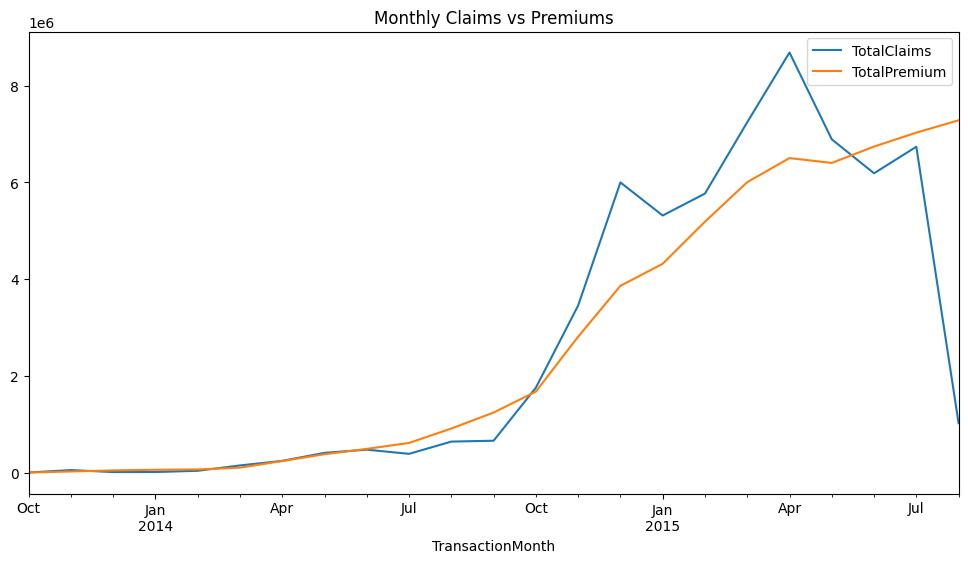

In [6]:
# Loss Ratio by Province
df.groupby('Province')['LossRatio'].mean().sort_values(ascending=False).plot(
    kind='bar', title='Avg Loss Ratio by Province', figsize=(10, 5))
plt.axhline(df['LossRatio'].mean(), color='red', linestyle='--', label='Portfolio Avg')
plt.legend()
plt.show()

# Correlation
corr = df[['TotalPremium', 'TotalClaims', 'CustomValueEstimate', 'LossRatio']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Temporal Trend
monthly = df.dropna(subset=['TransactionMonth'])
monthly = monthly.groupby(monthly['TransactionMonth'].dt.to_period('M'))[['TotalClaims', 'TotalPremium']].sum()
monthly.plot(title="Monthly Claims vs Premiums", figsize=(12,6))
plt.show()


Outlier Detection

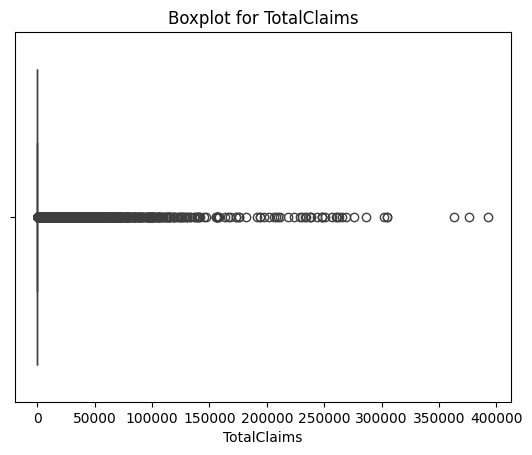

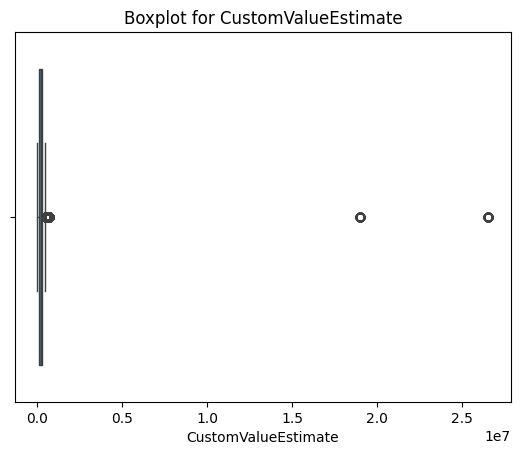

In [7]:
for col in ['TotalClaims', 'CustomValueEstimate']:
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot for {col}')
    plt.show()


Visualizations

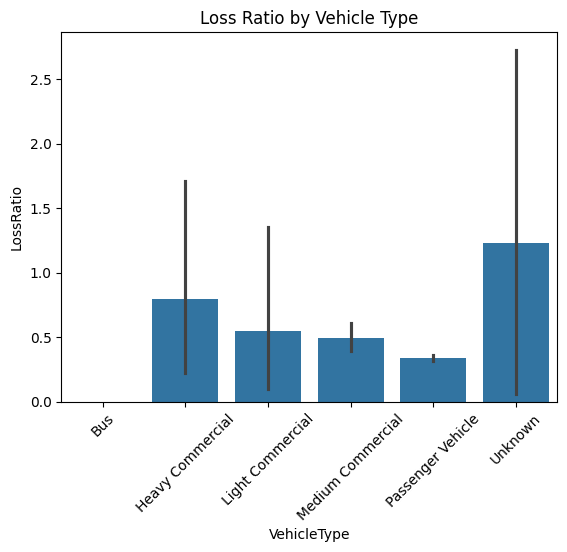

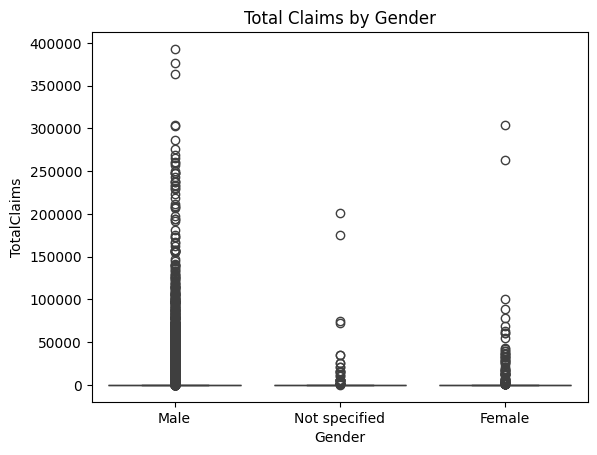

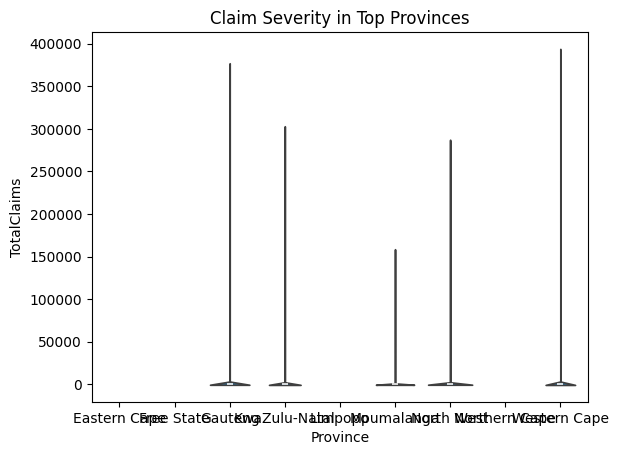

In [8]:
# 1. Vehicle Type vs Loss Ratio
sns.barplot(data=df, x='VehicleType', y='LossRatio')
plt.xticks(rotation=45)
plt.title('Loss Ratio by Vehicle Type')
plt.show()

# 2. Gender vs Total Claims
sns.boxplot(data=df, x='Gender', y='TotalClaims')
plt.title('Total Claims by Gender')
plt.show()

# 3. Top 5 Provinces Claim Severity
top_provinces = df['Province'].value_counts().nlargest(5).index
sns.violinplot(data=df[df['Province'].isin(top_provinces)], x='Province', y='TotalClaims')
plt.title('Claim Severity in Top Provinces')
plt.show()


## Key Insights

- Some provinces exhibit higher risk (Gauteng, Western Cape) based on loss ratio.
- Vehicle type significantly influences claims.
- Seasonal claim patterns exist.
- Several extreme outliers exist in `TotalClaims` and `CustomValueEstimate`.

These patterns support deeper statistical testing and modeling strategies.
